📋 Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
✅ Accuracy: 95.32 %


C:\Users\Admin\AppData\Local\Temp\ipykernel_4020\1610018048.py:47: UserWarning: Glyph 127895 (\N{REMINDER RIBBON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127895 (\N{REMINDER RIBBON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


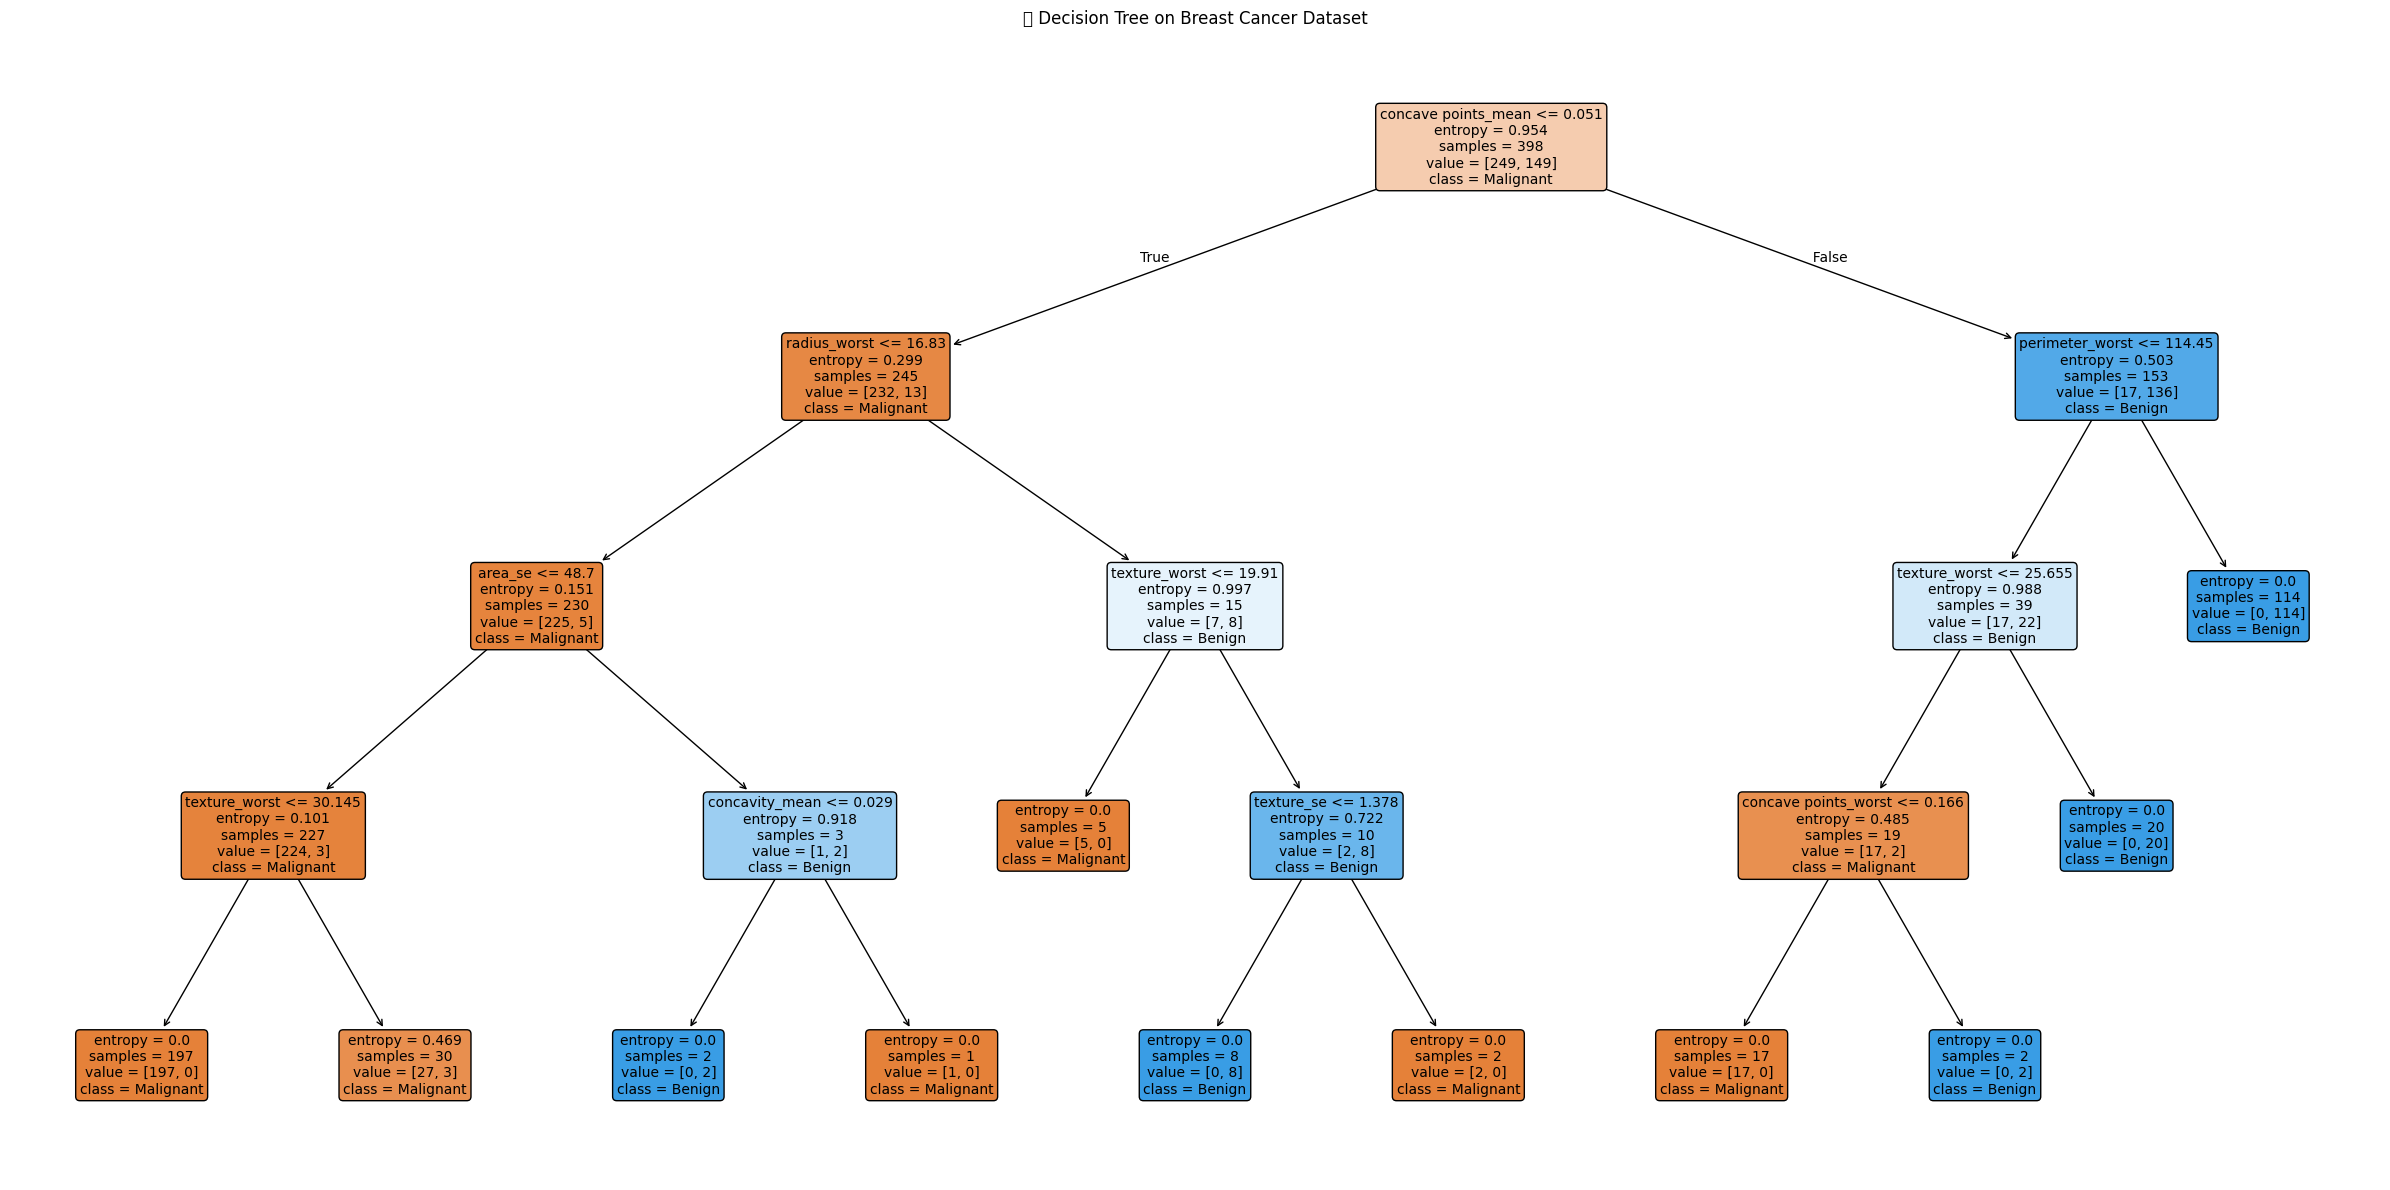

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df = pd.read_csv("breast-cancer.csv")
print("📋 Columns:", df.columns.tolist())

# Step 2: Preprocess — assume last column is target
if 'diagnosis' in df.columns:
    # Encode 'M'/'B' to 0/1 if needed
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])
    target_col = 'diagnosis'
elif 'target' in df.columns:
    target_col = 'target'
else:
    target_col = df.columns[-1]  

X = df.drop(target_col, axis=1)
y = df[target_col]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict & Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")

# Step 6: Visualize Tree
plt.figure(figsize=(24, 12))
plot_tree(model,
          feature_names=X.columns,
          class_names=['Malignant', 'Benign'] if y.nunique() == 2 else [str(i) for i in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("🎗️ Decision Tree on Breast Cancer Dataset")
plt.tight_layout()
plt.show()
